## Water Quality Prediction Using KNN Imputer and MLP


### 1. Config Settings

In [111]:
# dataset
dataset = None
dataset_rm = None
dataset_knn = None

# accuracy list
acc_rm_list = []
acc_knn_list = []
acc_score_rm_list = []

### 2. Dataset Investigation

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

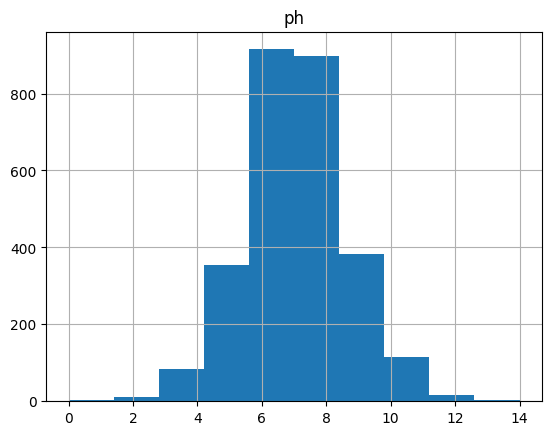

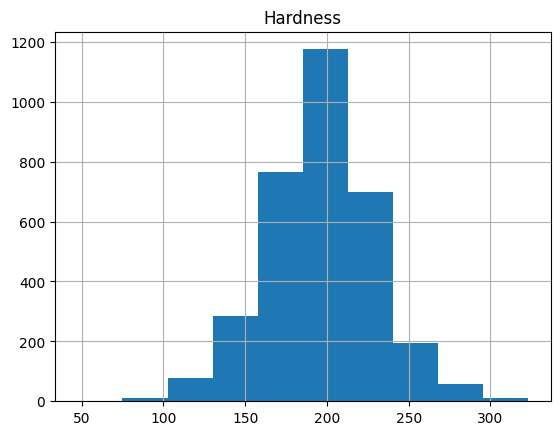

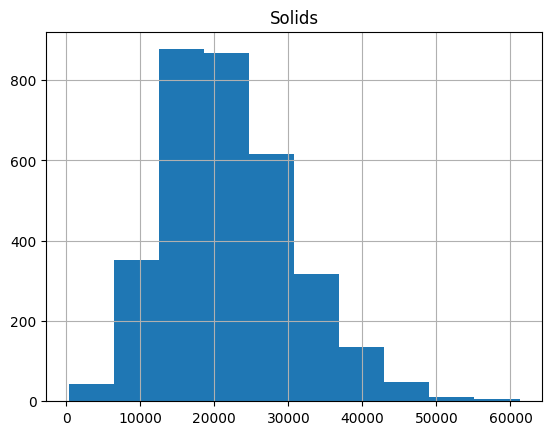

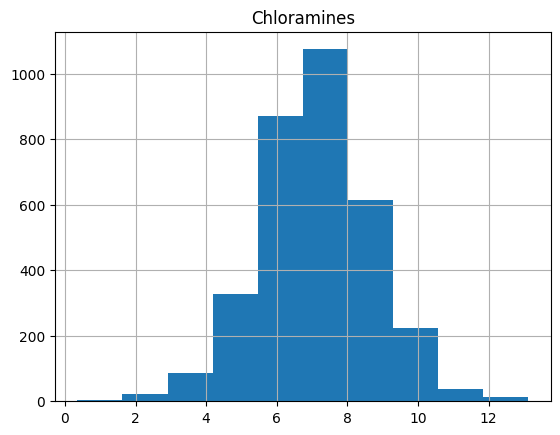

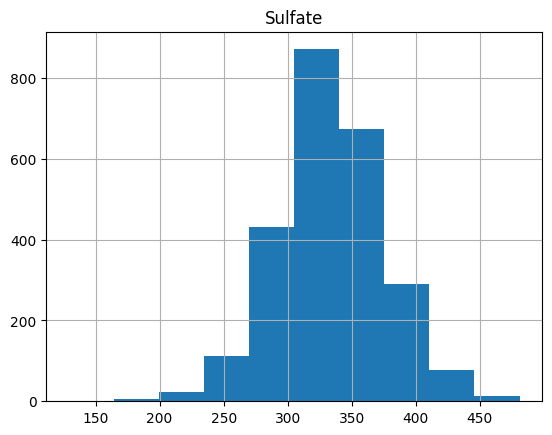

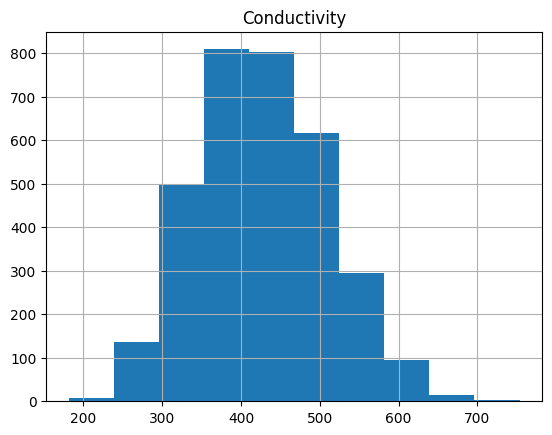

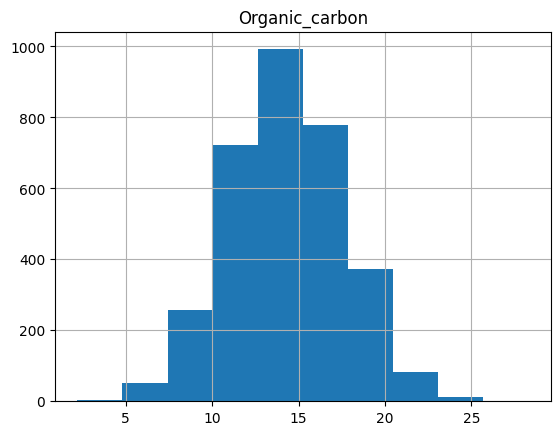

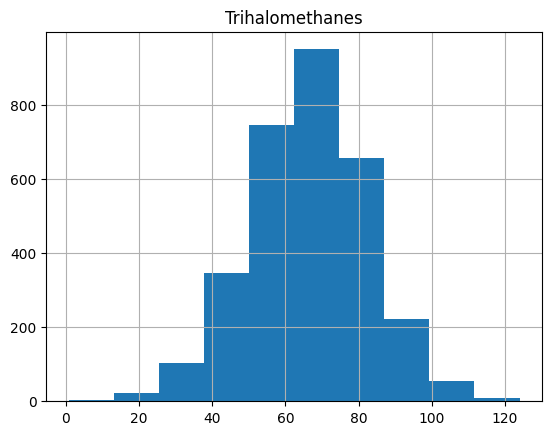

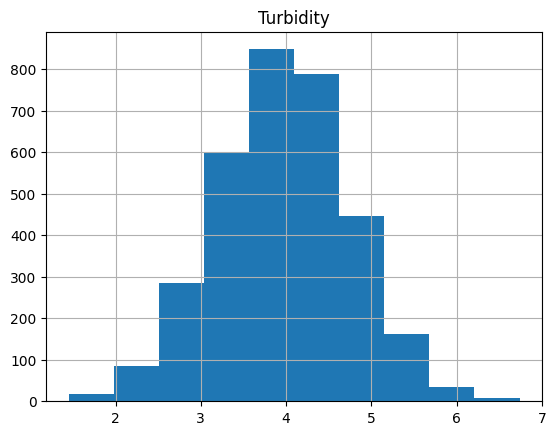

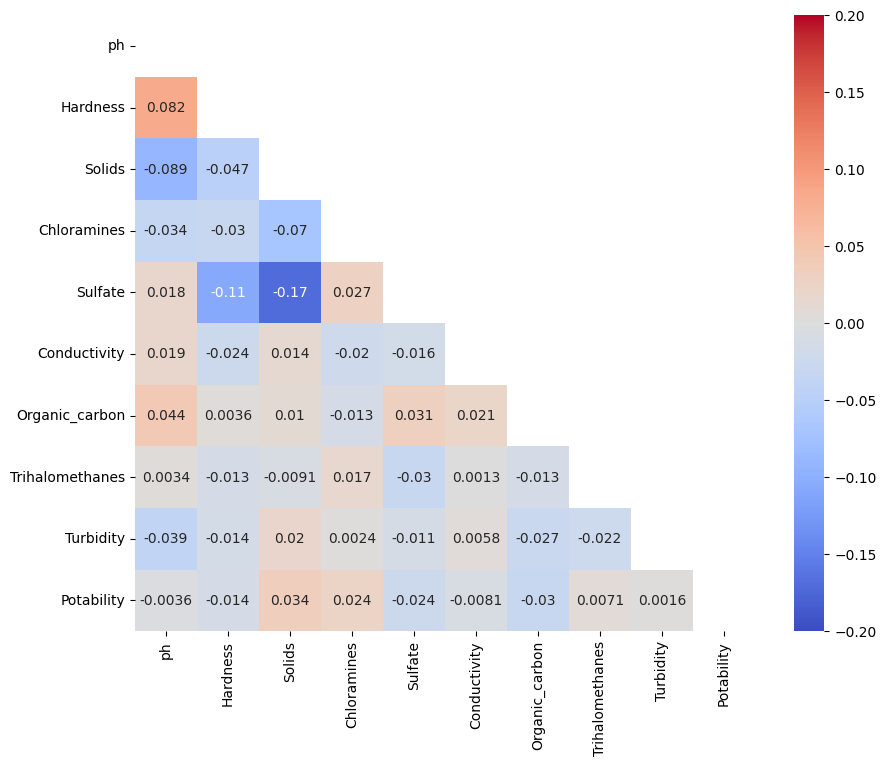

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read data
dataset = pd.read_csv('water_potability.csv')
print(dataset)

# plot histogram
columns_except_last = dataset.columns[:-1]
for column in columns_except_last:
    plt.figure()
    dataset[column].hist(bins=10)
    plt.title(column)
    plt.show()

# draw heatmap
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmin=-0.2, vmax=0.2)
plt.show()

### 3. Data Pre-processing

#### 3.1 Removing Missing Values 

In [113]:
dataset_rm = dataset.dropna()
print(dataset_rm)

             ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       363.266516       18.436524       100.341674   4.628771           0  
4    

#### 3.2 KNN Imputer

In [114]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5, weights = 'uniform')
dataset_knn = pd.DataFrame(imputer.fit_transform(dataset), columns = dataset.columns)
print(dataset_knn)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  364.091541   
3273  9.419510  175.762646  33155.578218     7.350233  327.357588   
3274  5.126763  230.603758  11983.869376     6.303357  325.952434   
3275  7.874671  195.102299  17404.177061     7.509306  345.728295   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135         0.0  
1       592.88535

### 4. Data Splitting and Model Training

#### 4.1 Splitting Training and Test Data in the Ratio of 7:3

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

def train(model, dataset, rand, image):

    # separate attributes and class label
    X = dataset.drop('Potability', axis = 1)
    y = dataset['Potability']

    # split dataset to training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = rand)

    # train model and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_test = y_test.to_numpy()

    # calculate accuracy measurements
    tp, fp, fn, tn = 0, 0, 0, 0
    for i in range(len(y_pred)):
        if y_pred[i] == 1 and y_test[i] == 1:
            tp += 1
        elif y_pred[i] == 1 and y_test[i] == 0:
            fp += 1
        elif y_pred[i] == 0 and y_test[i] == 1:
            fn += 1
        else:
            tn += 1

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)

    print('Accuracy: {}'.format(accuracy))
    print('Precision: {}'.format(precision))
    print('Recall: {}'.format(recall))
    print('F1 Score: {}'.format(f1))
    print()

    if image:
        # plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'crest')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

        # plot ROC curve
        y_prob = model.predict_proba(X_test)[:,0]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(tpr, fpr, label = 'auc = {}'.format(roc_auc_score(y_test, y_prob)))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc = 'lower right')
        plt.show()
    
    return [accuracy, precision, recall, f1]


### 4.2 10-Fold Cross-Validation

In [116]:
from sklearn.model_selection import cross_val_score

def train_cross_val(model, dataset):

    # separate attributes and class label
    X = dataset.drop('Potability', axis = 1)
    y = dataset['Potability']

    # perform 10-fold cross-validation
    scores = cross_val_score(model, X, y, cv = 10)

    # print mean and sd of error
    print('Mean:', 1 - scores.mean())
    print('Standard deviation:', scores.std())
    print()

    return [1 - scores.mean(), scores.std()]
    

### 5. Machine Learning Models

In [117]:
import warnings
warnings.filterwarnings('ignore')

#### 5.1 Logistic Regression

Accuracy: 0.4867549668874172
Precision: 0.36713286713286714
Recall: 0.44871794871794873
F1 Score: 0.40384615384615385

Accuracy: 0.54323499491353
Precision: 0.42857142857142855
Recall: 0.47164948453608246
F1 Score: 0.449079754601227



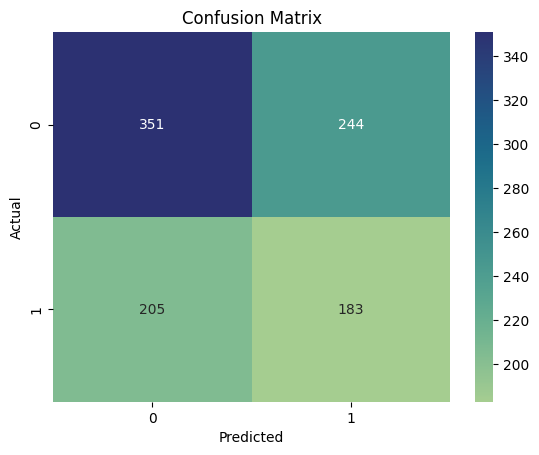

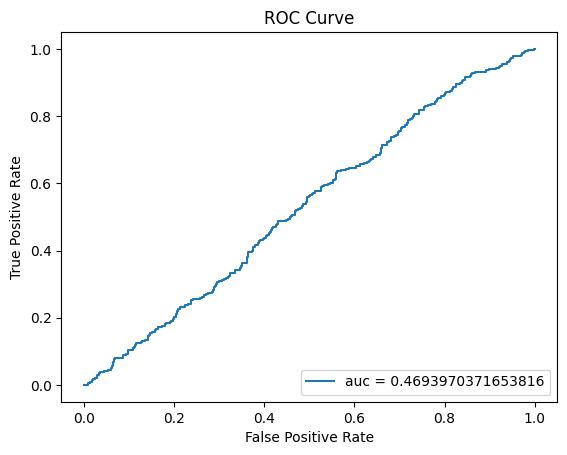

Mean: 0.4853086054874144
Standard deviation: 0.04264393001226118



In [118]:
from sklearn.linear_model import LogisticRegression

def LR():
    model = LogisticRegression(class_weight = 'balanced', max_iter = 50)
    acc_rm_list.append(train(model, dataset_rm, 24, False))
    acc_knn_list.append(train(model, dataset_knn, 3, True))
    acc_score_rm_list.append(train_cross_val(model, dataset_rm))

LR()

#### 5.2 Support Vector Classifier

Accuracy: 0.5165562913907285
Precision: 0.40384615384615385
Recall: 0.5431034482758621
F1 Score: 0.4632352941176471

Accuracy: 0.5808748728382502
Precision: 0.4460227272727273
Recall: 0.4197860962566845
F1 Score: 0.4325068870523416



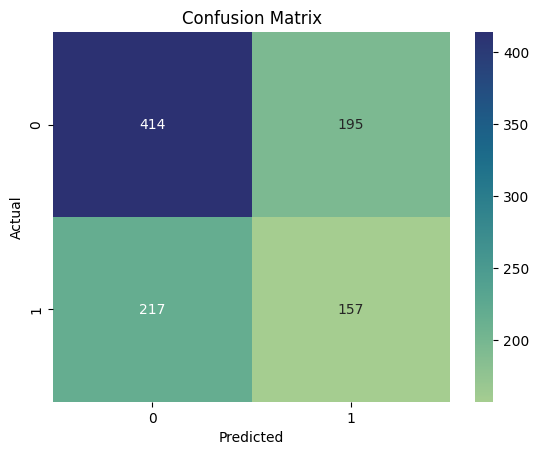

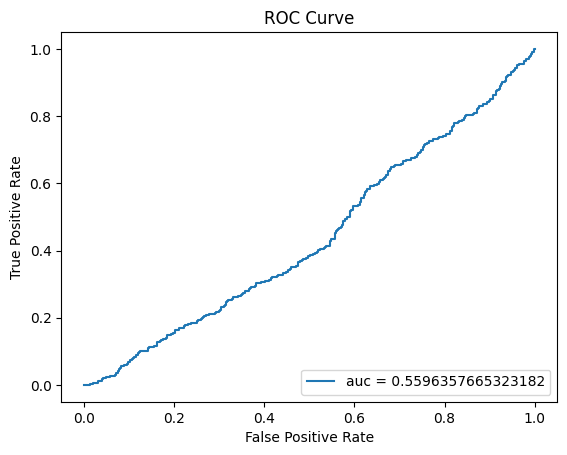

Mean: 0.4897788286291316
Standard deviation: 0.03815768394632888



In [119]:
from sklearn.svm import SVC

def SVM():
    svc = SVC(kernel='rbf', gamma=0.000001, random_state=42 ,C=5.3, probability=True, class_weight='balanced')
    acc_rm_list.append(train(svc, dataset_rm, 28, False))
    acc_knn_list.append(train(svc, dataset_knn, 113, True))
    acc_score_rm_list.append(train_cross_val(svc, dataset_rm))

SVM()

#### 5.3 Decision Tree

Accuracy: 0.6192052980132451
Precision: 0.5176991150442478
Recall: 0.49159663865546216
F1 Score: 0.5043103448275862

Accuracy: 0.6174974567650051
Precision: 0.4742268041237113
Recall: 0.5168539325842697
F1 Score: 0.4946236559139785



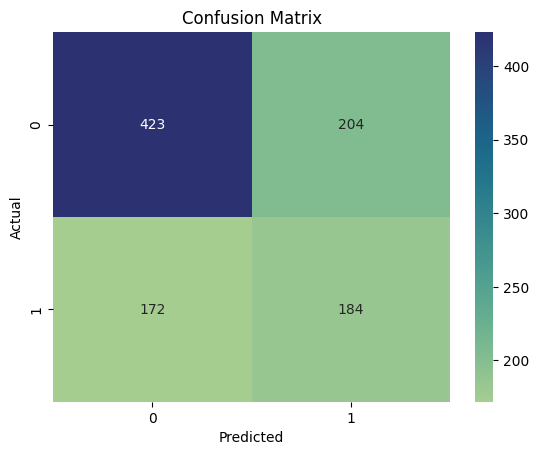

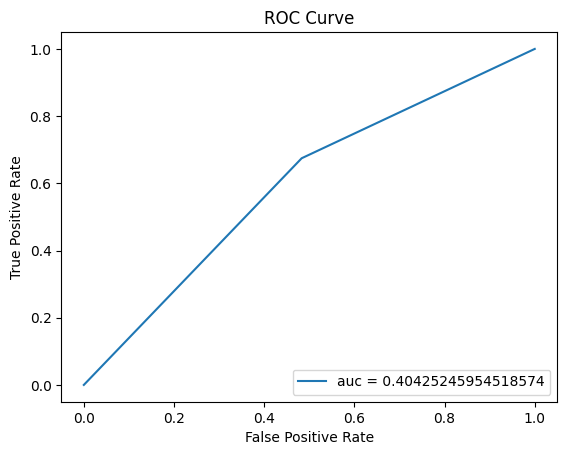

Mean: 0.42766366188857696
Standard deviation: 0.035837946393722966



In [120]:
from sklearn.tree import DecisionTreeClassifier

def DT():
    model = DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced', random_state=96)
    acc_rm_list.append(train(model, dataset_rm, 95, False))
    acc_knn_list.append(train(model, dataset_knn, 81, True))
    acc_score_rm_list.append(train_cross_val(model, dataset_rm))
    
DT()

#### 5.4 Random Forest

Accuracy: 0.6506622516556292
Precision: 0.574468085106383
Recall: 0.5487804878048781
F1 Score: 0.5613305613305614

Accuracy: 0.6663275686673449
Precision: 0.5962566844919787
Recall: 0.5575
F1 Score: 0.5762273901808787



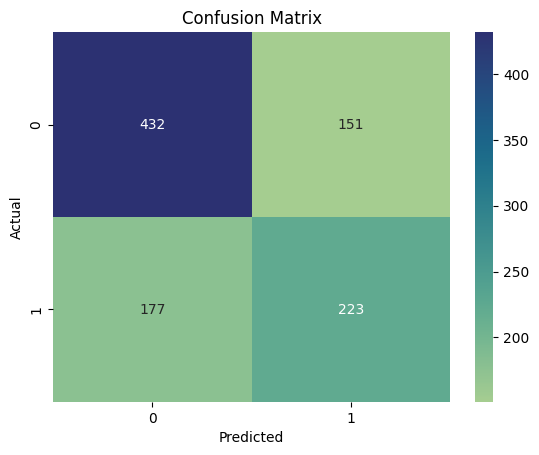

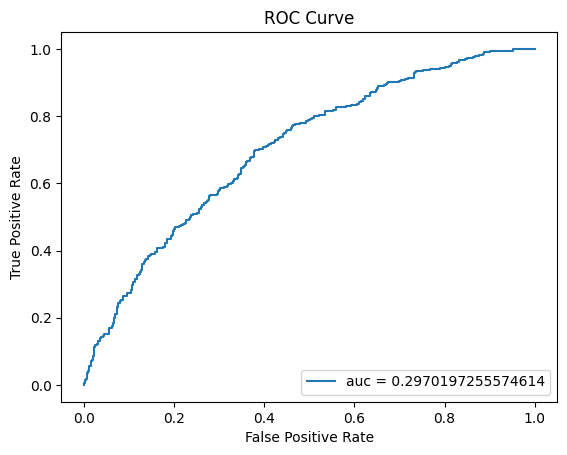

Mean: 0.3968499088714841
Standard deviation: 0.062421260050134215



In [121]:
from sklearn.ensemble import RandomForestClassifier

def RF():
    model = RandomForestClassifier(random_state=42, n_estimators=300, class_weight='balanced', max_depth=185, min_samples_leaf=35, min_samples_split=20)
    acc_rm_list.append(train(model, dataset_rm, 31, False))
    acc_knn_list.append(train(model, dataset_knn, 1234, True))
    acc_score_rm_list.append(train_cross_val(model, dataset_rm))

RF()

#### 5.5  K-Nearest Neighbor

Accuracy: 0.5728476821192053
Precision: 0.44680851063829785
Recall: 0.35294117647058826
F1 Score: 0.3943661971830986

Accuracy: 0.5961342828077314
Precision: 0.43346007604562736
Recall: 0.3149171270718232
F1 Score: 0.3648



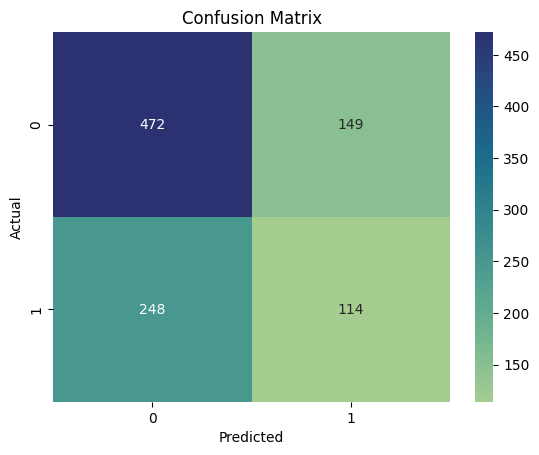

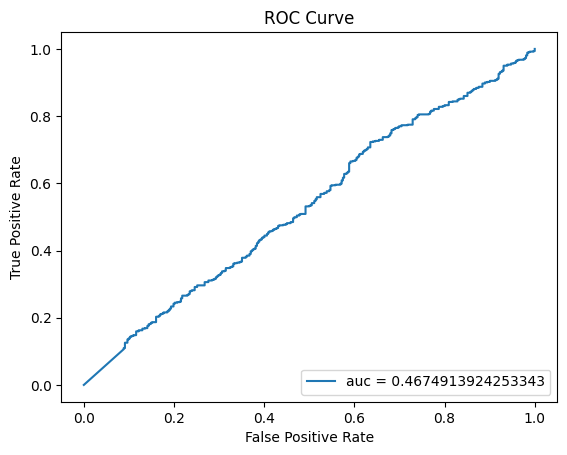

Mean: 0.4420767449879317
Standard deviation: 0.021999527346646387



In [122]:
from sklearn.neighbors import KNeighborsClassifier

def KNN():
    model = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
    acc_rm_list.append(train(model, dataset_rm, 33, False))
    acc_knn_list.append(train(model, dataset_knn, 35, True))
    acc_score_rm_list.append(train_cross_val(model, dataset_rm))

KNN()

#### 5.6 Stochastic Gradient Decent Classifier

Accuracy: 0.5049668874172185
Precision: 0.39501779359430605
Recall: 0.4625
F1 Score: 0.42610364683301344

Accuracy: 0.525940996948118
Precision: 0.421875
Recall: 0.4772727272727273
F1 Score: 0.44786729857819907



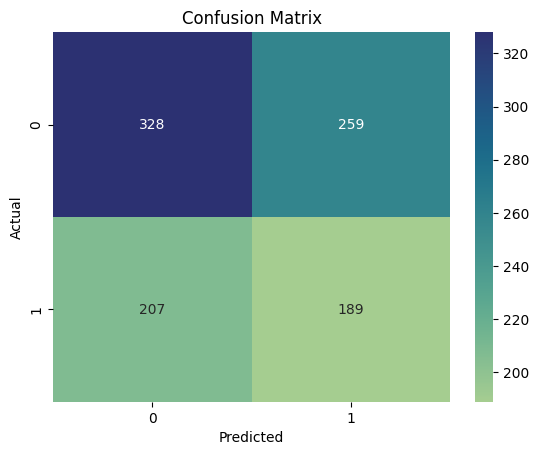

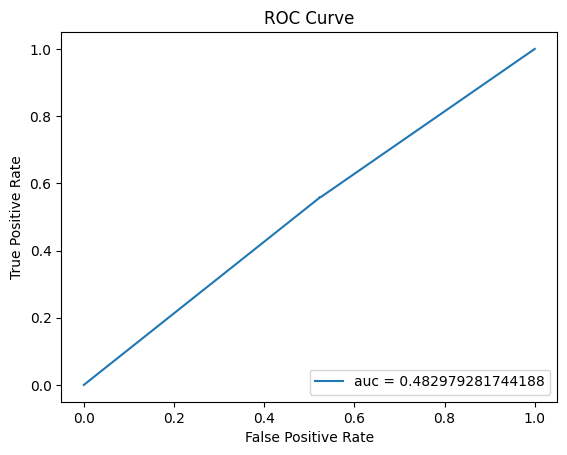

Mean: 0.5091941283680607
Standard deviation: 0.04244746859808839



In [123]:
from sklearn.linear_model import SGDClassifier

def SGDC():
    model = SGDClassifier(alpha=0.0001, loss='log_loss', penalty='l1', learning_rate='adaptive', eta0=0.25, class_weight = 'balanced', random_state=24)
    acc_rm_list.append(train(model, dataset_rm, 2, False))
    acc_knn_list.append(train(model, dataset_knn, 36, True))
    acc_score_rm_list.append(train_cross_val(model, dataset_rm))

SGDC()

#### 5.7 XGBoot

Accuracy: 0.6324503311258278
Precision: 0.559322033898305
Recall: 0.14410480349344978
F1 Score: 0.22916666666666666

Accuracy: 0.6612410986775178
Precision: 0.7058823529411765
Recall: 0.1329639889196676
F1 Score: 0.2237762237762238



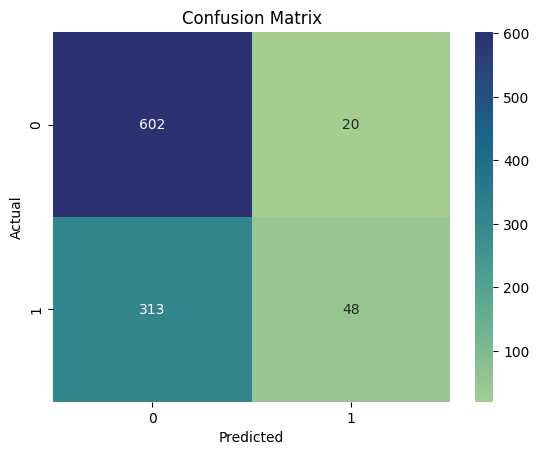

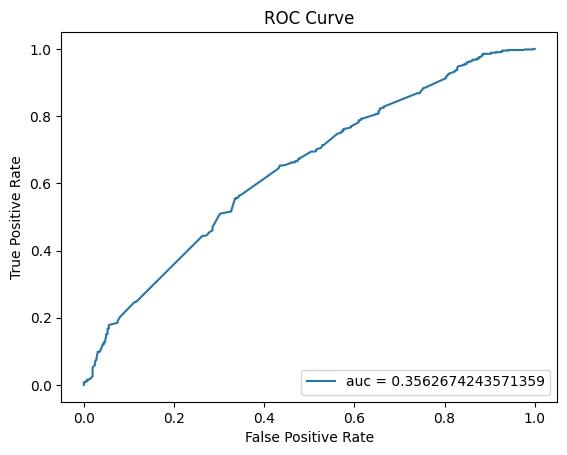

Mean: 0.3868725678538002
Standard deviation: 0.02723078494686123



In [124]:
from sklearn.ensemble import GradientBoostingClassifier

def XGB():
    model = GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.01)
    acc_rm_list.append(train(model, dataset_rm, 88, False))
    acc_knn_list.append(train(model, dataset_knn, 88, True))
    acc_score_rm_list.append(train_cross_val(model, dataset_rm))

XGB()

### 6. Machine Learning Models Evaluation

[Text(0.3, 0, 'LR'),
 Text(1.3, 0, 'SVC'),
 Text(2.3, 0, 'DT'),
 Text(3.3, 0, 'RF'),
 Text(4.3, 0, 'KNN'),
 Text(5.3, 0, 'SGDC'),
 Text(6.3, 0, 'XGB')]

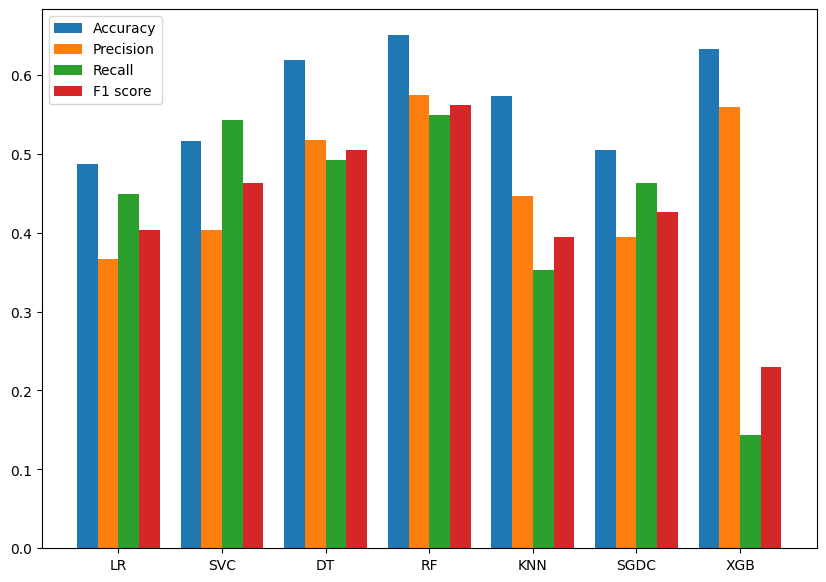

In [125]:
# accuracy graph for removing missing values
methods = ['LR', 'SVC', 'DT', 'RF', 'KNN', 'SGDC', 'XGB']

accuracy = []
precision = []
recall = []
f1 = []

for i in range(len(acc_rm_list)):
    accuracy.append(acc_rm_list[i][0])
    precision.append(acc_rm_list[i][1])
    recall.append(acc_rm_list[i][2])
    f1.append(acc_rm_list[i][3])

xticks = np.arange(len(methods))
bar_width = 0.2
fig, ax = plt.subplots(figsize = (10, 7))
ax.bar(xticks, accuracy, width = bar_width, label = 'Accuracy')
ax.bar(xticks + bar_width, precision, width = bar_width, label = 'Precision')
ax.bar(xticks + bar_width * 2, recall, width = bar_width, label = 'Recall')
ax.bar(xticks + bar_width * 3, f1, width = bar_width, label = 'F1 score')
ax.legend()
ax.set_xticks(xticks + 0.3)
ax.set_xticklabels(methods)


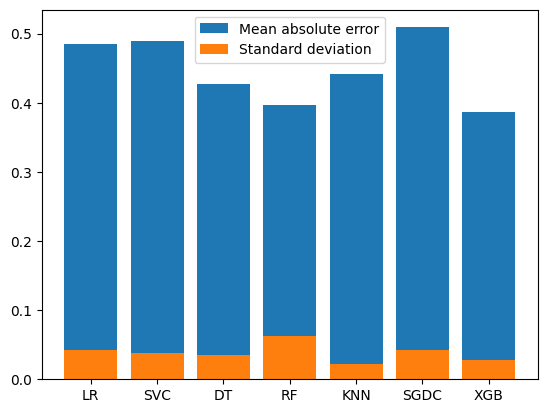

In [131]:
# error graph for removing missing values
mean = []
std = []
for i in range(len(acc_score_rm_list)):
    mean.append(acc_score_rm_list[i][0])
    std.append(acc_score_rm_list[i][1])

plt.bar(methods, mean, label = 'Mean absolute error')
plt.bar(methods, std, label = 'Standard deviation')
plt.legend()
plt.show()

[Text(0.3, 0, 'LR'),
 Text(1.3, 0, 'SVC'),
 Text(2.3, 0, 'DT'),
 Text(3.3, 0, 'RF'),
 Text(4.3, 0, 'KNN'),
 Text(5.3, 0, 'SGDC'),
 Text(6.3, 0, 'XGB')]

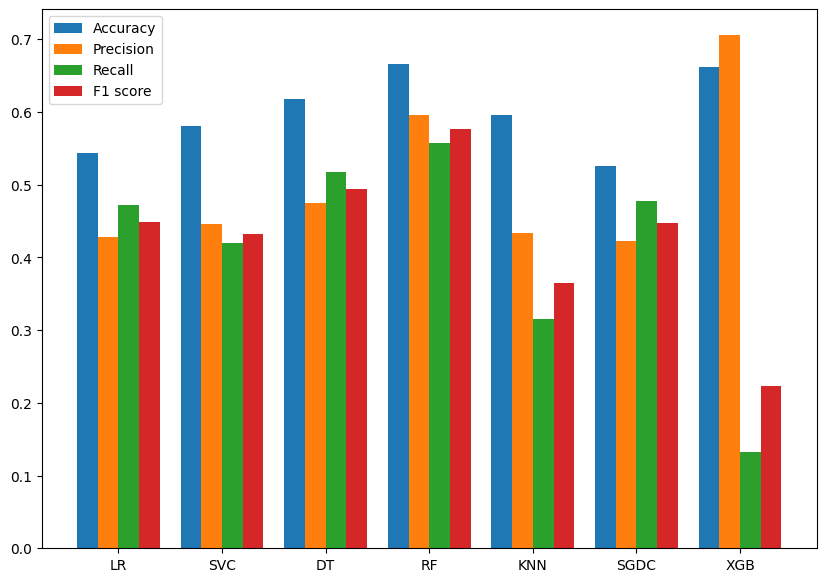

In [127]:
# accuracy graph for knn impute
accuracy = []
precision = []
recall = []
f1 = []

for i in range(len(acc_knn_list)):
    accuracy.append(acc_knn_list[i][0])
    precision.append(acc_knn_list[i][1])
    recall.append(acc_knn_list[i][2])
    f1.append(acc_knn_list[i][3])


xticks = np.arange(len(methods))
bar_width = 0.2
fig, ax = plt.subplots(figsize = (10, 7))
ax.bar(xticks, accuracy, width = bar_width, label = 'Accuracy')
ax.bar(xticks + bar_width, precision, width = bar_width, label = 'Precision')
ax.bar(xticks + bar_width * 2, recall, width = bar_width, label = 'Recall')
ax.bar(xticks + bar_width * 3, f1, width = bar_width, label = 'F1 score')
ax.legend()
ax.set_xticks(xticks + 0.3)
ax.set_xticklabels(methods)

[Text(0.1, 0, 'LR'),
 Text(1.1, 0, 'SVC'),
 Text(2.1, 0, 'DT'),
 Text(3.1, 0, 'RF'),
 Text(4.1, 0, 'KNN'),
 Text(5.1, 0, 'SGDC'),
 Text(6.1, 0, 'XGB')]

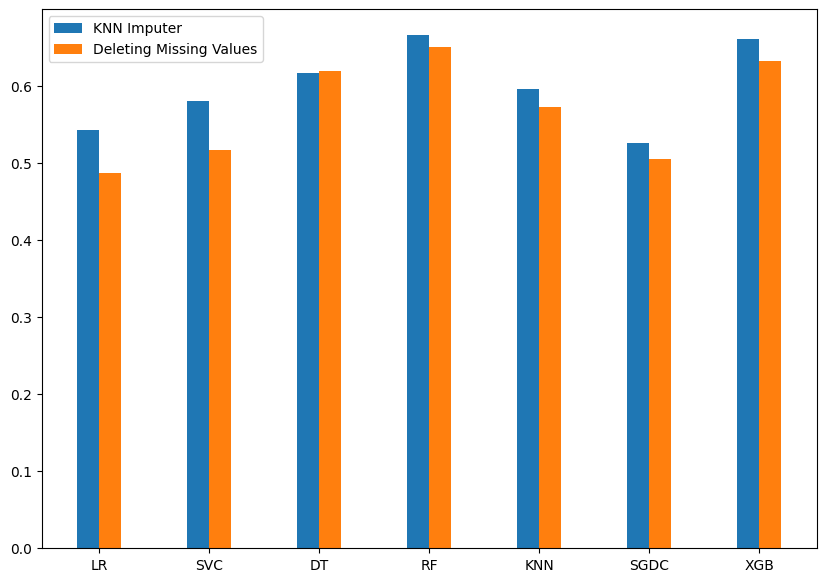

In [128]:
# accuracy graph for comparison
accuracy_rm = []
accuracy_knn = []

for i in range(len(acc_rm_list)):
    accuracy_rm.append(acc_rm_list[i][0])
    accuracy_knn.append(acc_knn_list[i][0])

xticks = np.arange(len(methods))
bar_width = 0.2
fig, ax = plt.subplots(figsize = (10, 7))
ax.bar(xticks, accuracy_knn, width = bar_width, label = 'KNN Imputer')
ax.bar(xticks + bar_width, accuracy_rm, width = bar_width, label = 'Deleting Missing Values')
ax.legend()
ax.set_xticks(xticks + 0.1)
ax.set_xticklabels(methods)

### 7. Deep Learning Model and Evaluation

In [129]:
from sklearn.neural_network import MLPClassifier

def MLP(layers):
    model = MLPClassifier(hidden_layer_sizes=layers, alpha=0.00001, random_state=42, learning_rate_init=0.001, batch_size=100, solver='adam')
    acc_rm_list.append(train(model, dataset_rm))
    acc_knn_list.append(train(model, dataset_knn))
    acc_score_rm_list.append(train_cross_val(model, dataset_rm))


MLP((10, 8, 6))
MLP((10, 10, 10, 10, 10, 10))
MLP((250, 250, 250, 250, 250, 250, 250, 250, 250))

TypeError: train() missing 2 required positional arguments: 'rand' and 'image'